# **LangGraph Glossary 02:**

1. Concepts of State, Nodes and Edges.
2. Message Passing Algorithm, Graph, StateGraph, and MessageGraph.
3. Schema, Multiple Schemas, Reducers.
4. Working with Messages in Graph State.

## **Concepts of State, Nodes and Edges:**

**State:** <br>
The State represents the **data/data structure** that flows through the graph during the execution of a workflow. It is a dynamic object that holds the current context or information as the workflow progresses. The state is updated as the workflow moves from one node to another.
**Holds the data as it flows through the workflow.**

* **The state can be a simple dictionary, a Pydantic model, or any other data structure that holds the necessary information.**
* **Each node in the graph can read from and modify the state.**

<br><br>

**Nodes:** <br>
Nodes are the <u>individual units of work or processing steps in the graph</u>. Each node performs a specific task or computation and can modify the state.

* Nodes are functions or callable objects that take the current state as input, perform some operations, and return an updated state.
* Nodes can represent tasks like data processing, API calls, or decision-making logic.

<br><br>

**Edges:** <br>
Edges define the flow of control between nodes. They determine which node should be executed next based on the current state or the output of the previous node.

* Edges can be conditional (e.g., based on a decision) or unconditional (always move to the next node).
* They are used to create the structure of the workflow and define the order in which nodes are executed.

### **Example 01:**

In [1]:
# Step 1: Define the State: The state will hold the user's name, age, and the final message.


from typing import Dict, Any

# Define the state as a dictionary
State = Dict[str, Any]

In [2]:
# Step 2: Define the Nodes: 
# Check Eligibility: Checks if the user is eligible to vote.
# Generate Message: Generates a message based on the eligibility.


def check_eligibility(state: State) -> State:
    age = state["age"]
    state["is_eligible"] = age >= 18
    return state



def generate_message(state: State) -> State:
    if state["is_eligible"]:
        state["message"] = f"{state['name']}, you are eligible to vote!"

    else:
        state["message"] = f"{state['name']}, you are not eligible to vote yet."
        
    return state

In [3]:
# Step 3: Define the Edges

from langgraph.graph import Graph

# Create a graph
workflow = Graph()

# Add nodes to the graph
workflow.add_node("check_eligibility", check_eligibility)
workflow.add_node("generate_message", generate_message)

# Define edges
workflow.add_edge("check_eligibility", "generate_message")

In [4]:
# Step 4: Define the Entry Point and the Finish Point:
workflow.set_entry_point("check_eligibility")
workflow.set_finish_point("generate_message")

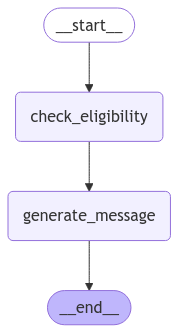

In [5]:
# Step 5: Compile and Run the Workflow:

app = workflow.compile()
app

In [6]:
# Step 6: Invoke:

# Define the initial state
initial_state = {"name": "Alice", "age": 20}

# Run the workflow
final_state = app.invoke(initial_state)
final_state

{'name': 'Alice',
 'age': 20,
 'is_eligible': True,
 'message': 'Alice, you are eligible to vote!'}

In [7]:
# Final Output:

final_state["message"]

'Alice, you are eligible to vote!'

## **Message Passing Algorithm, Graph, StateGraph, and MessageGraph:**

### **1. Message Passing Algorithm:**

The **Message Passing Algorithm** is a mechanism for propagating information (messages) between nodes in a graph. Each node processes the incoming messages, performs computations, and sends updated messages to other nodes.

* **How It Works:**
    * Nodes in the graph exchange messages, which can be data, state updates, or any other information.
    * Each node processes the messages it receives, updates its internal state (if any), and sends new messages to its neighboring nodes.
    * This process continues until a termination condition is met (e.g., no more messages to process or a specific state is reached).

* **Use Cases:**
    * Message passing is commonly used in distributed systems, graph-based workflows, and machine learning algorithms (e.g., belief propagation in probabilistic graphical models).

#### **Example 01:**

In [13]:
from langgraph.graph import Graph
from typing import Dict, Any


# Define the state as a dictionary
State = Dict[str, Any]

# Define a simple graph with two nodes
graph = Graph()

# Node 1: Adds a greeting to the message
def node_1(state: dict) -> dict:
    state["message"] = f"Hello, {state['name']}!"
    return state

# Node 2: Adds a farewell to the message
def node_2(state: dict) -> dict:
    state["message"] += " Goodbye!"
    return state

# Add nodes to the graph
graph.add_node("greet", node_1)
graph.add_node("farewell", node_2)

# Define edges: greet -> farewell
graph.add_edge("greet", "farewell")

# Set the entry point
graph.set_entry_point("greet")

# Set the finish point
graph.set_finish_point("farewell")

# Compile the graph
app = graph.compile()

# Run the graph with an initial state
initial_state = {"name": "Alice"}
final_state = app.invoke(initial_state)
final_state["message"]


'Hello, Alice! Goodbye!'

### **2. Graph:**

A **Graph** in LangGraph is a collection of **nodes** and **edges** that define a workflow. It represents the structure of the computation or process. 

* **Nodes:** Perform tasks or computations.
* **Edges:** Define the flow of control between nodes.

#### **Example 01:**

In [14]:
from langgraph.graph import Graph

# Create a graph
graph = Graph()

# Define nodes
def node_a(state: dict) -> dict:
    state["output"] = "Node A executed"
    return state

def node_b(state: dict) -> dict:
    state["output"] += " -> Node B executed"
    return state

# Add nodes to the graph
graph.add_node("A", node_a)
graph.add_node("B", node_b)

# Define edges: A -> B
graph.add_edge("A", "B")

# Set the entry point
graph.set_entry_point("A")

# Set the finish point
graph.set_finish_point("B")

# Compile the graph
app = graph.compile()

# Run the graph
initial_state = {}
final_state = app.invoke(initial_state)

print(final_state["output"])  # Output: Node A executed -> Node B executed

Node A executed -> Node B executed


### **3. StateGraph:**

<u>A **StateGraph** is a specialized type of graph where the workflow is driven by the **State** (State is data/data structure that flow the data through workflow).</u> The state is passed between nodes, and each node can modify it. 

* **Key Features:**

    * The state is a dynamic object that holds the current context.
    * Nodes read from and update the state.
    * Edges determine the flow based on the state.

#### **Example 01:**

In [16]:
from langgraph.graph import StateGraph

# Define the state as a dictionary
State = dict

# Create a StateGraph
state_graph = StateGraph(State)

# Define nodes
def node_1(state: State) -> State:
    state["value"] = 10
    return state

def node_2(state: State) -> State:
    state["value"] *= 2
    return state

# Add nodes to the graph
state_graph.add_node("start", node_1)
state_graph.add_node("process", node_2)

# Define edges: start -> process
state_graph.add_edge("start", "process")

# Set the entry point
state_graph.set_entry_point("start")

# Set the finish point
state_graph.set_finish_point("process")

# Compile the graph
app = state_graph.compile()

# Run the graph
initial_state = {}
final_state = app.invoke(initial_state)

print(final_state["value"])

20


### **4. MessageGraph:**

<u>A **MessageGraph** is a specialized graph where the workflow is driven by **messages** passed between nodes.</u> Each node processes incoming messages and sends new messages to other nodes.

* **Key Features:**
    * Messages are the primary means of communication between nodes.
    * Nodes can send messages to one or more nodes.
    * The workflow continues until no more messages are left to process.

#### **Example 01:**

In [19]:
from langgraph.graph import MessageGraph

# Create a MessageGraph
message_graph = MessageGraph()

# Define nodes
def node_1(messages: list) -> list:
    return [f"Processed: {msg}" for msg in messages]

def node_2(messages: list) -> list:
    return [f"Final: {msg}" for msg in messages]

# Add nodes to the graph
message_graph.add_node("process", node_1)
message_graph.add_node("finalize", node_2)

# Define edges: process -> finalize
message_graph.add_edge("process", "finalize")

# Set the entry point
message_graph.set_entry_point("process")

# Set the finish point
message_graph.set_finish_point("finalize")


# Compile the graph
app = message_graph.compile()

# Run the graph with initial messages
initial_messages = ["Message 1", "Message 2"]
final_messages = app.invoke(initial_messages)

final_messages 

[HumanMessage(content='Message 1', additional_kwargs={}, response_metadata={}, id='daa0ae40-74d6-460a-89d9-f19f89a45fda'),
 HumanMessage(content='Message 2', additional_kwargs={}, response_metadata={}, id='0e6a68eb-c36f-4f04-8255-06a4e21edd6d'),
 HumanMessage(content="Processed: content='Message 1' additional_kwargs={} response_metadata={} id='daa0ae40-74d6-460a-89d9-f19f89a45fda'", additional_kwargs={}, response_metadata={}, id='63df6485-fe17-4790-89a5-cc2db15b7378'),
 HumanMessage(content="Processed: content='Message 2' additional_kwargs={} response_metadata={} id='0e6a68eb-c36f-4f04-8255-06a4e21edd6d'", additional_kwargs={}, response_metadata={}, id='588f9ea1-7f49-4184-ae71-e28d6e51fafa'),
 HumanMessage(content="Final: content='Message 1' additional_kwargs={} response_metadata={} id='daa0ae40-74d6-460a-89d9-f19f89a45fda'", additional_kwargs={}, response_metadata={}, id='73260599-90b1-4830-a8ca-c6088bb54922'),
 HumanMessage(content="Final: content='Message 2' additional_kwargs={} res

## **3. Schema, Multiple Schemas and Reducers:**

### **1. Schema:**

<u>A **Schema** defines the structure and types of the data (state or messages) that flow through the graph.</u> It ensures that the data adheres to a specific format, making the workflow more robust and easier to debug.

* **Purpose**:
    * Provides a blueprint for the data.
    * Enables validation and type checking.
    * Improves readability and maintainability of the workflow.

* **Example:**
    * A schema can be defined using Pydantic models, dictionaries, or other data structures.

In [22]:
# Example of Schema in LangGraph:

from pydantic import BaseModel

# Define a schema for the state using Pydantic
class UserState(BaseModel):
    name: str
    age: int
    is_eligible: bool = False

# Example usage in a workflow
state = UserState(name="Alice", age=25)
print(state)


name='Alice' age=25 is_eligible=False


### **2. Multiple Schemas:**

In complex workflows, you may need to handle **multiple schemas** for different parts of the state or for different types of messages. This allows you to modularize and organize the data effectively. 

* **Purpose:**
    * Separates concerns by defining different schemas for different parts of the workflow.
    * Ensures that each part of the workflow operates on well-defined data.


#### **Example 01:**

In [23]:
from pydantic import BaseModel

# Schema for user information
class UserInfo(BaseModel):
    name: str
    age: int

# Schema for eligibility status
class EligibilityStatus(BaseModel):
    is_eligible: bool

# Combined state
class UserState(BaseModel):
    user: UserInfo
    status: EligibilityStatus

# Example usage
state = UserState(
    user=UserInfo(name="Alice", age=25),
    status=EligibilityStatus(is_eligible=True)
)
print(state)
# Output: user=UserInfo(name='Alice', age=25) status=EligibilityStatus(is_eligible=True)

user=UserInfo(name='Alice', age=25) status=EligibilityStatus(is_eligible=True)


#### **Example 02:**

In [25]:
# Define The Schemas:
from typing import TypedDict


"""
    InputState:

    Represents the initial input to the workflow.
    Contains a single field: user_input (a string).
"""
class InputState(TypedDict):
    user_input: str


"""
    OutputState:

    Represents the final output of the workflow.
    Contains a single field: graph_output (a string).
"""
class OutputState(TypedDict):
    graph_output: str


"""
    OverallState:

    Represents the shared state that is passed between nodes.
    Contains three fields: foo, user_input, and graph_output (all strings).
"""
class OverallState(TypedDict):
    foo: str
    user_input: str
    graph_output: str


"""
    PrivateState:

    Represents a private state used internally by a specific node.
    Contains a single field: bar (a string).
"""
class PrivateState(TypedDict):
    bar: str

In [30]:
# Create a Node 1:

# Takes InputState as input.
# Writes to OverallState by adding " name" to the user_input.


def node_1(state: InputState) -> OverallState:
    # Write to OverallState
    return {"foo": state["user_input"] + " name"}

node_1({"user_input": "My"})

{'foo': 'My name'}

In [31]:
# Create Node 2:

# Takes OverallState as input.
# Writes to PrivateState by adding " is" to the foo field.


def node_2(state: OverallState) -> PrivateState:
    # Read from OverallState, write to PrivateState
    return {"bar": state["foo"] + " is"}


node_2({"foo": "My name"})

{'bar': 'My name is'}

In [33]:
# Create Node 3:

# Takes PrivateState as input.
# Writes to OutputState by adding " Dibyendu" to the bar field.

def node_3(state: PrivateState) -> OutputState:
    # Read from PrivateState, write to OutputState
    return {"graph_output": state["bar"] + " Dibyendu"}


node_3({"bar": "My name is"})

{'graph_output': 'My name is Dibyendu'}

The **StateGraph** is used to define the workflow. It specifies the **initial state** (**`InputState`**), the **shared state** (**`OverallState`**), and the **final output** (**`OutputState`**).


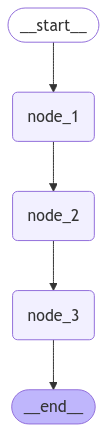

In [38]:
from langgraph.graph import StateGraph, START, END


builder = StateGraph(state_schema=OverallState, input=InputState, output=OutputState)


builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", "node_3")
builder.add_edge("node_3", END)

graph = builder.compile()
graph

In [39]:
graph.invoke({"user_input":"My"})

{'graph_output': 'My name is Dibyendu'}

**Workflow Execution Breakdown:** <br>

1. **Initial Input:**
    * The workflow starts with the input: `{"user_input": "My"}`.

2. **Node 1:**
    * Input: `{"user_input": "My"}`.
    * Output: `{"foo": "My name"}`.
    * The **`foo`** field is added to the **shared state** (**OverallState**).

3. **Node 2:**
    * Input: `{"foo": "My name"}`.
    * Output: `{"bar": "My name is"}`.
    * The **`bar`** field is added to the **`private state`** (**PrivateState**).

4. **Node 3:**
    * Input: `{"bar": "My name is"}`.
    * Output: `{"graph_output": "My name is Lance"}`.
    * The **`graph_output`** field is added to the **`output state`** (**OutputState**).

5. **Final Output:**
    * The workflow returns: `{"graph_output": "My name is Lance"}`.

## **3. Reducers:**

<u>**Reducers** are key to understanding how updates from nodes are applied to the **State**.</u> Each key in the State has its own independent reducer function. If no reducer function is explicitly specified then it is assumed that all updates to that key should override it. <br>

**Reducers** are functions that combine or reduce multiple updates to the state into a single state. They are particularly useful when multiple nodes modify the state concurrently or when you need to aggregate changes.

* **Purpose:**
    * Ensures that the state is updated consistently.
    * Aggregates partial updates from multiple nodes.
    * Simplifies state management in complex workflows.


* **Detailed Explanation of Reducers:**
    1. **How Reducers Work:**
        * Each node in the graph can modify the state.
        * The reducer function takes the **current state** and the **new state** (from a node) as input and **combines them into a single state**.
        * This ensures that the state is updated consistently, even when multiple nodes modify it.

    2. **Use Cases:**
        * When multiple nodes update different parts of the state, the reducer ensures that all updates are merged correctly.
        * For example, in a workflow where one node updates user information and another node updates eligibility status, the reducer combines these updates into a single state.

#### **Example 01:**

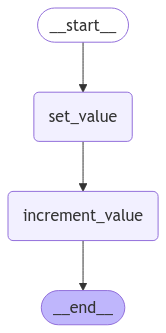

In [42]:
from typing import Dict, Any
from langgraph.graph import StateGraph

# Define the state as a dictionary
State = Dict[str, Any]


# Define nodes
def node_1(state: State) -> State:
    state["value"] = 10
    return state

def node_2(state: State) -> State:
    state["value"] += 5
    return state


# Define a reducer to combine state updates
def reducer(current_state: State, new_state: State) -> State:
    return {**current_state, **new_state}


# Create a StateGraph
state_graph = StateGraph(State)

# Add nodes to the graph
state_graph.add_node("set_value", node_1)
state_graph.add_node("increment_value", node_2)



# Define edges: set_value -> increment_value
state_graph.add_edge("set_value", "increment_value")

# Set the entry point
state_graph.set_entry_point("set_value")

# Set the Finish Point
state_graph.set_finish_point("increment_value")

# Compile the graph
app = state_graph.compile()
app

In [43]:
# Run the workflow
initial_state = {}
final_state = app.invoke(initial_state)

print(final_state["value"])  # Output: 15

15


In this example, the reducer is implicitly handled by the **StateGraph**. Each node updates the state, and the graph ensures that the state is passed correctly between nodes.

#### **Exaple 02:**

In [45]:
from pydantic import BaseModel
from langgraph.graph import StateGraph
from typing import Dict, Any

# Define schemas using Pydantic
class UserInfo(BaseModel):
    name: str
    age: int

class EligibilityStatus(BaseModel):
    is_eligible: bool

class UserState(BaseModel):
    user: UserInfo
    status: EligibilityStatus

# Define the state as a dictionary
State = Dict[str, Any]

# Create a StateGraph
state_graph = StateGraph(State)

# Define nodes
def set_user_info(state: State) -> State:
    state["user"] = {"name": "Alice", "age": 25}
    return state

def check_eligibility(state: State) -> State:
    age = state["user"]["age"]
    state["status"] = {"is_eligible": age >= 18}
    return state

# Add nodes to the graph
state_graph.add_node("set_user_info", set_user_info)
state_graph.add_node("check_eligibility", check_eligibility)

# Define edges: set_user_info -> check_eligibility
state_graph.add_edge("set_user_info", "check_eligibility")

# Set the entry point
state_graph.set_entry_point("set_user_info")

# Set the Finish Point
state_graph.set_finish_point("check_eligibility")

# Compile the graph
app = state_graph.compile()

# Run the graph
initial_state = {}
final_state = app.invoke(initial_state)

# Convert the final state to the UserState schema
user_state = UserState(**final_state)
print(user_state)
# Output: user=UserInfo(name='Alice', age=25) status=EligibilityStatus(is_eligible=True)

user=UserInfo(name='Alice', age=25) status=EligibilityStatus(is_eligible=True)


## **4. Working with Messages in Graph State:**

### **4.1. Why use Messages:**

Most modern LLM providers have a chat model interface that accepts a list of messages as input. LangChain's ChatModel in particular accepts a list of Message objects as inputs. These messages come in a variety of forms such as **HumanMessage** `(user input)` or **AIMessage** `(LLM response)`. <br>

Messages are used to pass structured data between nodes in a workflow. **They are particularly useful in scenarios where:**

* **Modularity:** Each node in the graph can operate independently by processing incoming messages and producing outgoing messages.
* **Integration with LLMs:** Messages can be used to send prompts to LLMs and receive their responses.
* **Asynchronous Workflows:** Messages enable asynchronous communication between nodes, making it easier to handle complex workflows.
* **State Management:** Messages can be used to update the state of the graph incrementally.

<br>


**Example Use Case:** <br>
**Imagine a chatbot workflow where:** <br>

1. A user sends a message.
2. The message is processed by an LLM to generate a response.
3. The response is sent back to the user.


Messages are used to pass the user input, LLM response, and other metadata between nodes.

### **4.2 Working with Messages in Graph State:**

In **LangGraph**, the Graph State can include messages as part of its structure. Messages are typically stored in a list or dictionary within the state, allowing nodes to read, modify, or add new messages. <br>


**When integrating LLMs, messages are used to:**
* Send prompts to the LLM.
* Store the LLM’s responses.
* Pass additional metadata (e.g., conversation history, context).

<br>

**Example: Working with Messages** <br>
**Let’s create a workflow where:**

1. A user sends a message.
2. The message is passed to an LLM to generate a response.
3. The LLM’s response is added to the conversation history.

In [ ]:
from langgraph.graph import StateGraph
from typing import Dict, List, Any
from dotenv import load_dotenv
import os



load_dotenv()
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")



# Define the state with a list of messages
State = Dict[str, Any]

# Create a StateGraph
state_graph = StateGraph(State)

# Node 1: Add a user message to the state
def add_user_message(state: State) -> State:
    user_message = {"role": "user", "content": "Hello, how are you?"}
    state["messages"] = [user_message]
    return state

# Node 2: Send the user message to an LLM and get a response
def call_llm(state: State) -> State:
    from langchain_google_genai import ChatGoogleGenerativeAI
    
    # Initialize the LLM
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

    # Get the user message
    user_message = state["messages"][-1]["content"]

    # Generate a response using the LLM
    llm_response = llm.invoke(user_message)

    # Add the LLM response to the messages
    state["messages"].append({"role": "assistant", "content": llm_response})
    return state

# Add nodes to the graph
state_graph.add_node("add_user_message", add_user_message)
state_graph.add_node("call_llm", call_llm)

# Define edges: add_user_message -> call_llm
state_graph.add_edge("add_user_message", "call_llm")

# Set the entry point
state_graph.set_entry_point("add_user_message")

# Compile the graph
app = state_graph.compile()

# Run the graph
initial_state = {}
final_state = app.invoke(initial_state)

# Print the final state
print(final_state["messages"])

[{'role': 'user', 'content': 'Hello, how are you?'}, {'role': 'assistant', 'content': AIMessage(content='I am doing well, thank you for asking. How are you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-d93dc0b2-3bc6-46e9-818e-31d6ace14047-0', usage_metadata={'input_tokens': 7, 'output_tokens': 16, 'total_tokens': 23, 'input_token_details': {'cache_read': 0}})}]


In [48]:
final_messages

[HumanMessage(content='Message 1', additional_kwargs={}, response_metadata={}, id='daa0ae40-74d6-460a-89d9-f19f89a45fda'),
 HumanMessage(content='Message 2', additional_kwargs={}, response_metadata={}, id='0e6a68eb-c36f-4f04-8255-06a4e21edd6d'),
 HumanMessage(content="Processed: content='Message 1' additional_kwargs={} response_metadata={} id='daa0ae40-74d6-460a-89d9-f19f89a45fda'", additional_kwargs={}, response_metadata={}, id='63df6485-fe17-4790-89a5-cc2db15b7378'),
 HumanMessage(content="Processed: content='Message 2' additional_kwargs={} response_metadata={} id='0e6a68eb-c36f-4f04-8255-06a4e21edd6d'", additional_kwargs={}, response_metadata={}, id='588f9ea1-7f49-4184-ae71-e28d6e51fafa'),
 HumanMessage(content="Final: content='Message 1' additional_kwargs={} response_metadata={} id='daa0ae40-74d6-460a-89d9-f19f89a45fda'", additional_kwargs={}, response_metadata={}, id='73260599-90b1-4830-a8ca-c6088bb54922'),
 HumanMessage(content="Final: content='Message 2' additional_kwargs={} res

### **4.3 Serialization:**

**Serialization** is the process of converting data (e.g., messages, state) into a format that can be stored or transmitted (e.g., JSON). In LangGraph, serialization is important for:

* **Persistence:** Saving the state of the workflow to a database or file.
* **Interoperability:** Exchanging data between different systems or services.
* **Debugging:** Logging the state and messages for debugging purposes.

### **4.4 MessageState:**

**MessageState** is a specialized state that focuses on managing messages in a workflow. It typically includes:

* A list of messages (e.g., conversation history).
* Metadata about the messages (e.g., roles, timestamps).

#### **Example 01:**

In [50]:
from pydantic import BaseModel
from typing import List, Dict


# Define a schema for messages
class Message(BaseModel):
    role: str  # e.g., "user", "assistant"
    content: str


# Define the MessageState, that holds a list of messages
class MessageState(BaseModel):
    messages: List[Message]

In [62]:
# Create Nodes:

# Node 1: Add a user message
def add_user_message(state: MessageState) -> MessageState:
    # Check if there are any existing messages
    if not state.messages:
        # Add a default user message if no messages exist
        user_message = Message(role="user", content="Hello, how are you?")
        state.messages.append(user_message)
    return state



# Node 2: Call an LLM and add its response
def call_llm(state: MessageState) -> MessageState:
    from langchain_google_genai import ChatGoogleGenerativeAI
    
    # Initialize the LLM
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

    # Get the user message
    user_message = state.messages[-1].content

    # Generate a response using the LLM
    llm_response = llm.invoke(user_message)

    # Extract the content from the AIMessage object
    llm_content = llm_response.content

    # Add the LLM response to the messages
    state.messages.append(Message(role="assistant", content=llm_content))
    return state

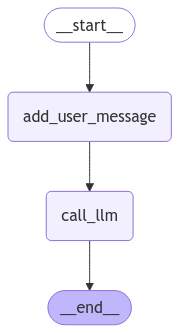

In [63]:
# Create a StateGraph with MessageState:

state_graph = StateGraph(MessageState)


# Add nodes to the graph
state_graph.add_node("add_user_message", add_user_message)
state_graph.add_node("call_llm", call_llm)


# Define edges: add_user_message -> call_llm
state_graph.add_edge("add_user_message", "call_llm")


# Set the entry point:
state_graph.set_entry_point("add_user_message")

# Set Finish Poing:
state_graph.set_finish_point("call_llm")


# Compile the graph:
app = state_graph.compile()
app

In [64]:
# Run the graph
initial_state = MessageState(messages=[])
final_state = app.invoke(initial_state)
final_state

{'messages': [Message(role='user', content='Hello, how are you?'),
  Message(role='assistant', content='I am doing well, thank you for asking! How are you today?')]}

In [65]:
initial_state = MessageState(messages=[Message(role='user', content='Who are you?')])
final_state = app.invoke(initial_state)
final_state

{'messages': [Message(role='user', content='Who are you?'),
  Message(role='assistant', content='I am a large language model, trained by Google.')]}